<a href="https://colab.research.google.com/github/AndrewH707/TicTacToe/blob/main/TicTacoToe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import collections
from matplotlib import pyplot as plt

#future possible updates: check subdiagonal and have player take turns

class tictacotoe():

  def __init__(self, size):
    self.size = size
    self.board = np.zeros((self.size, self.size))
    self.terminal = False #game is not in the terminal(finished) state by default 
    self.empty = collections.defaultdict(lambda: True) #location at [i, j] is
                                                      # True by default, meaning
                                                      #it's empty
    return 

  def reset(self):
    self.board = np.zeros((self.size, self.size))
    self.empty = collections.defaultdict(lambda: True)
    self.terminal = False
    return

  def display(self):
    c = plt.imshow(self.board, cmap = 'binary', interpolation= 'nearest')
    plt.colorbar(c)
    plt.title('Current Board')
    plt.show()
    return

  def win(self): # check if there are 3 in a row

    size = self.size
    type_win = -1 #default value, it means no win found

    neg_diag = []

    #check negative diagonal
    for i in range(size-1, 0, -1):
      neg_diag.append(self.board[i, i])
    result = np.all(neg_diag == neg_diag[0])
    if ((result != False) & (neg_diag[0] != 0)):
      self.terminal = True
      type_win = 0 
    

    #check positive diagoal
    pos_diag = [self.board[i][len(self.board)-1-i] for i in range(len(self.board))]
    result = np.all(pos_diag == pos_diag[0])
    if ((result != False) & (pos_diag[0] != 0)):
      self.terminal = True
      type_win = 1 
    
  
    #check if there's a win across a column
    for j in range(0, size, 1): #iterate through columns
      entries = []
      for i in range(0, size, 1): # append elements from all rows
        entries.append(self.board[i, j])
      result = np.all(entries == entries[0]) #check if all elements are equal
      if ((result != False) & (entries[0] != 0)): # if we win, exit
        self.terminal = True
        type_win = 2
        column_index = j
        break

    # check if there's a win across a row 
    for i in range(0, size, 1): #iterate through rows
      entries = []
      for j in range(0, size, 1): # append elements from each column along row i
        entries.append(self.board[i, j])
      result = np.all(entries == entries[0]) # check if all elements are equal
      if ((result != False) & (entries[0] != 0)): # if we win, exit
        self.terminal = True
        type_win = 3
        row_index = i
        break

    if (type_win == -1):
      print("continue...")
    elif (type_win == 0):
      print("Win along the negative diagonal")
    elif (type_win == 1):
      print("Win along the positive diagonal")
    elif (type_win == 2):
      print("WIN! column: ", column_index)
    else:
      print("WIN! row: ", row_index)

    return 

  def move(self, action, location): # action will be 0 or 1, location will be 
                                    # tuple with coordinates (i, j) matrix notation
    
    i = location[0]
    j = location[1]

    #check if location is available

    if (self.empty[(i, j)] != False):
      # assign value to action for plotting reasons
      if (action == 0):
        value = -1
      else:
        value = 1

      self.board[i, j] = value
      self.empty[(i, j)] = False
      return
    else: 
      return
  


  
    


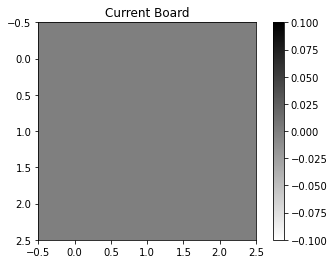

In [ ]:
game = tictacotoe(3)
game.display()
game.move(0, (0, 0))

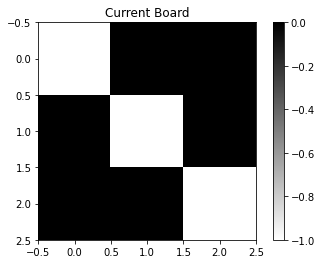

Win along the negative diagonal


In [ ]:
game.move(0, (0, 0)) # test output for win on negative diagonal 
game.move(0, (1, 1))
game.move(0, (2, 2))
game.display()
game.win()

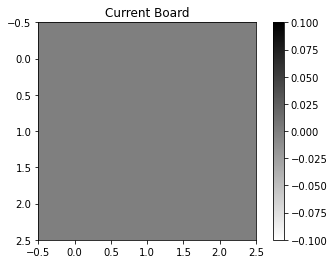

In [ ]:
# lets test our reset function...
game.reset()
game.display()

Win along the positive diagonal


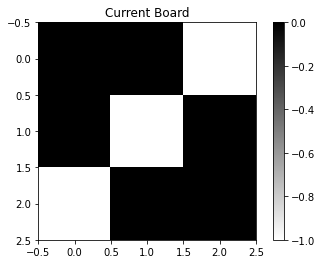

In [ ]:
# lets win on the positive diagonal
game.move(0, (2, 0)) # action 0 at row i = 2 and column j = 0
game.move(0, (1, 1)) # action 0 at row i = 1 and column i = 1
game.move(0, (0, 2))
game.win() # test output for win on positive
game.display()

WIN! row:  1


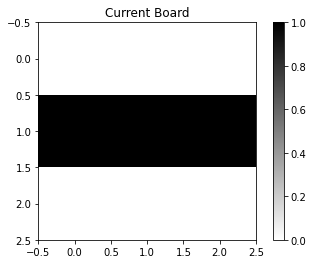

In [ ]:
#reset and check win in middle row
game.reset()
game.move(1, (1, 0)) #action 1, location [i=1, j= 0]
game.move(1, (1, 1))
game.move(1, (1, 2))
game.win()
game.display()

WIN! column:  2


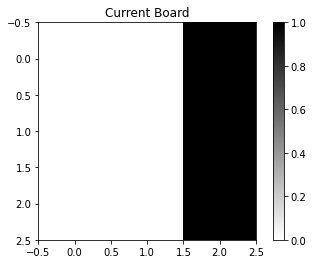

In [ ]:
# reset and check win along last column on the right
game.reset()
game.move(1, (0, 2)) 
game.move(1, (1, 2))
game.move(1, (2, 2))
game.win()
game.display()